**Introduction**
--
Agriland prices are an important variable for Rabobank stress tests, but are mising in the data delivery. This means no scenarios are provided. The MES team is responsible to deliver historical agriland timeseries to the application. 
Using standard shocks (defined in a steering data table), this module computes the required scenarios.

**Flow**
--

**Input : Historical Data -->** <br>

**Agriland (used for creating baseline, plus and minus scenarios by means of shocks) --> On each scenario extension is performed**<br>

**Output : Forecast values for a long time period on all three scenarios**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scenario_calculator.modelling.agriland import apply_agriland_model

We always have the starting point(year and associated quater), say **XQ** year, of extension to be performed on. <br>

We do the shock analysis **2 years** prior to the starting point, i.e. **XQ-2**. <br>

Historical data is available only uptil a certain time period, say **YQ** year, the gap:<br>

**(XQ - 2) - YQ** is again estimated using AR modelling.

The parameters for Agriland implementation are:<br>

![image.png](attachment:image.png)

**series :** original historical series <br>
**mu** : 'p' parameter for ARIMA model<br>
**alpha**: 'q' parameter of ARIMA model <br>
**start_shock_date**: start year of extension using ARIMA <br>
**end_shock_date**: end year of extension using ARIMA <br>
**shock_value**: parameter for modelling shock for the start->end time period <br>

  requesting_institution source time_series_code  period     value  \
0               Rabobank    FAR            NLAGR  2000Q1  1.000000   
1               Rabobank    FAR            NLAGR  2000Q2  1.000000   
2               Rabobank    FAR            NLAGR  2000Q3  1.000000   
3               Rabobank    FAR            NLAGR  2000Q4  1.000000   
4               Rabobank    FAR            NLAGR  2001Q1  1.064771   

         type     unit     description  
0  Historical  ABS_ACT  Agriland Index  
1  Historical  ABS_ACT  Agriland Index  
2  Historical  ABS_ACT  Agriland Index  
3  Historical  ABS_ACT  Agriland Index  
4  Historical  ABS_ACT  Agriland Index  


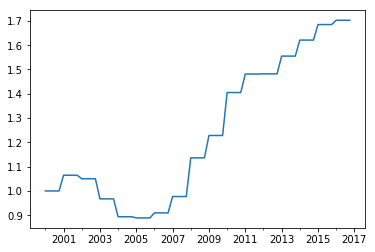

In [2]:
# Reading historical data from sample dataset

hist_data = pd.read_excel('agriland_data.xlsx')
print(hist_data.head())
start = 2000
end = 2016 + 1
date_index = pd.date_range(str(start), str(end), freq="Q")
series = pd.Series(hist_data['value'].tolist(), date_index)

series.plot()
pyplot.show()

**Baseline Scenario**
--

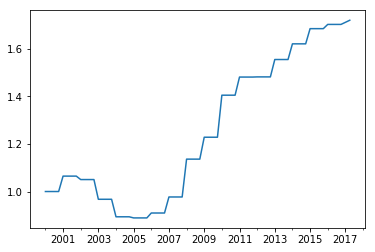

In [3]:
#apply_agriland_model(series, mu, alpha, start_shock_date, end_shock_date, rel_shock_val)
mu = 0.035777611
alpha = 0.5967979
start_shock_date = '2017Q2' # 2017Q1 is the gap here, where AR model is used for extension
end_shock_date = '2017Q2'
shock_value = 1.0000

base_series = apply_agriland_model(series, mu, alpha, start_shock_date, end_shock_date, shock_value)

base_series.plot()
pyplot.show()

**Baseline Plus**
--

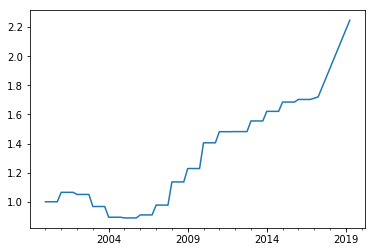

In [4]:
end_shock_date = '2019Q2'
shock_value = 1.3062

base_plus = apply_agriland_model(series, mu, alpha, start_shock_date, end_shock_date, shock_value)

base_plus.plot()
pyplot.show()

**Baseline Minus**
--

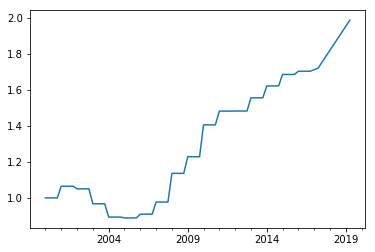

In [5]:
end_shock_date = '2019Q2'
shock_value = 0.8836

base_minus = apply_agriland_model(series, mu, alpha, start_shock_date, end_shock_date, shock_value)

base_minus.plot()
pyplot.show()

**Plotting all the scenarios on one graph**
--

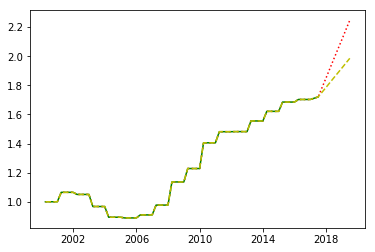

In [6]:
pyplot.plot(base_plus, ':r')
pyplot.plot(base_series, 'g')
pyplot.plot(base_minus, '--y')